In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices
from scipy.stats import mannwhitneyu

1. gender – Пол клиента (0-муж, 1-жен)
2. Near_Location – Проживает ли клиент рядом с местом предоставления услуг (1 - да, 0 - нет).
3. Partner – Является ли клиент сотрудником компании-партнера.
4. Promo_friends – Зарегистрировался ли клиент через акцию "приведи друга" (1 - да, 0 - нет).
5. Phone – Есть ли у клиента указанный номер телефона (1 - да, 0 - нет).
6. Contract_period – Срок действия контракта (в месяцах).
7. Group_visits – Посещает ли клиент групповые занятия (1 - да, 0 - нет).
8. Age – Возраст клиента.
9. Avg_additional_charges_total – Средняя сумма дополнительных расходов клиента (покупки напитков, прокат оборудования).
10. Month_to_end_contract – Количество месяцев до окончания текущего контракта.
11. Lifetime – Длительность взаимодействия клиента с компанией (в месяцах).
12. Avg_class_frequency_total – Средняя частота посещений занятий клиентом за всё время.
13. Avg_class_frequency_current_month – Средняя частота посещений занятий клиентом за последний месяц.
14. Churn – Целевой столбец, указывающий, ушел ли клиент (1 - ушел, 0 - остался).

In [4]:
file = r'C:\\Users\palux\Desktop\df s\gym_churn.csv'
df = pd.read_csv(file)

In [5]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [ ]:
df.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
df.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Пропущеных значений нет

In [8]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Проверяю распределения по факторам: 
    'Age', 'Lifetime', 'Avg_class_frequency_total', 'Avg_additional_charges_total'

Остальные факторы исследую далее

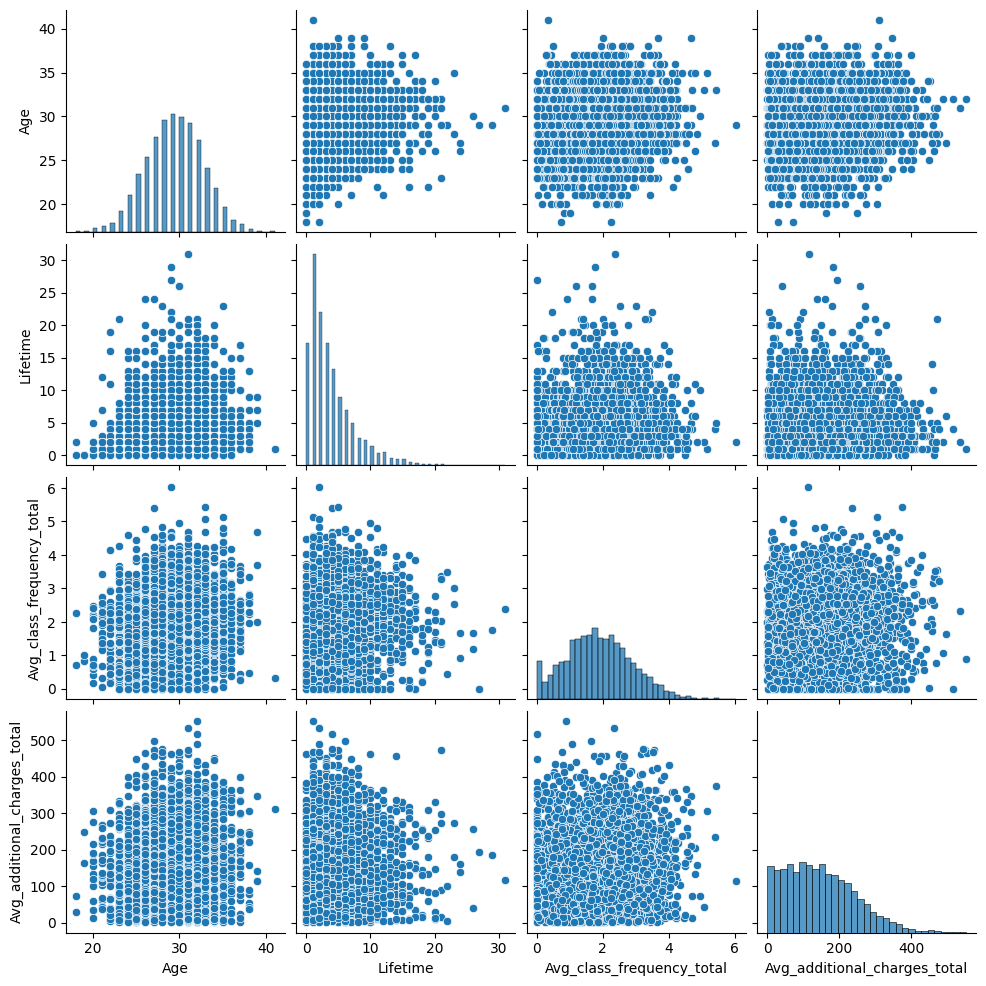

In [9]:
sns.pairplot(df[['Age', 'Lifetime', 'Avg_class_frequency_total',
                 'Avg_additional_charges_total']])
plt.show()

Из графика можно предположить о:

    1. Фактор Age имеет нормальное распределение
    2. Факторы Lifetime, Avg_class_frequency_total, Avg_additional_charges_total не имеют нормальное распределение

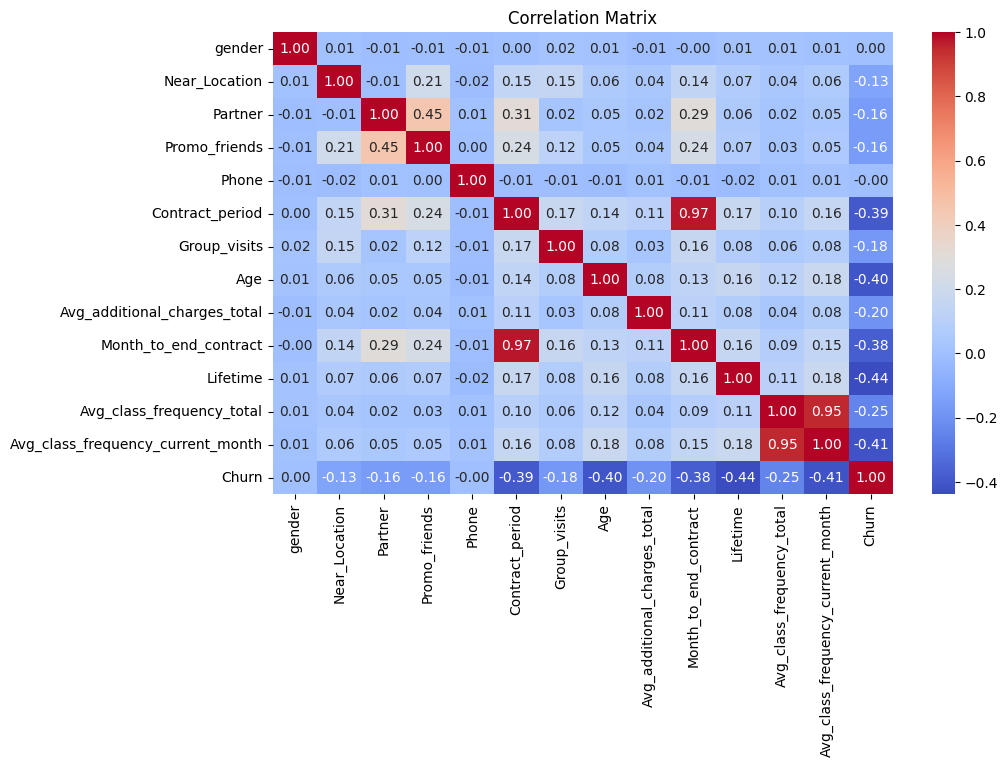

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

Изходя из таблицы корреляции можно сделать предположения:
    
    1. Между факторами Partner и Promo_friend (0.45) наблюдается положительная корреляция, что можно интерпритировать как

Клиенты, пригласившие людей по партнёрской программе, с высокой вероятностью являются партнерами. Это может влиять на фактор оттока (Churn).

    2. Между факторами Partner и Contact_period наблюдается положительная корреляция (0.31) , что можно интерпритировать как:

Клиенты, участвующие в партнёрской программе (Partner = 1), имеют большую вероятность заключать контракты на более долгосрочные периоды.

    3. Между факторами Partner и Mouth_to_end_contract наблюдается положительная связь (0.29), это указывает на:

Клиенты, использующие партнёрскую программу, чаще приобретают абонементы на более длительный срок.

    4. Связь между фактором Promo_friend и Contact_period, Mouth_to_end_contract также подтверждают предположения в пунктах 2,3.

    5. Между факторами Contact_period и Mouth_to_end_contract (0.97) высокая положительная связь, что эти факторы несут схожую информацию. Возможно, имеет смысл рассмотреть удаление одного из них.

    6. Между факторами Avg_class_frequency_current_month и Avg_class_frequency_total  (0.95) высокая положительная связь, что также может указывать на избыточную информацию. Возможно, стоит удалить один из этих факторов.

    7. Между факторами Churn и Contract_period, Age, Month_to_end_contract, Lifetime, Avg_class_frequency_current_month наблюдается умеренная отрицательная корреляция, что указывает на отрицательное влияние этих факторов на отток клиентов. В дальнейшем исследовании будет проверено, как эти факторы влияют на отток.

    8. Между факторами Churn и Near_Location, Partner, Promo_friends, Group_visits,Avg_additional_charges_total наблюдается слабая корреляция (менее 0.3), что указывает на незначительное влияние этих факторов на оттко клиетов. В дальнейшем в исследование эти факторы не будут проверятся, с целью концентрации на более влиятельных факторах.



In [11]:
df

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


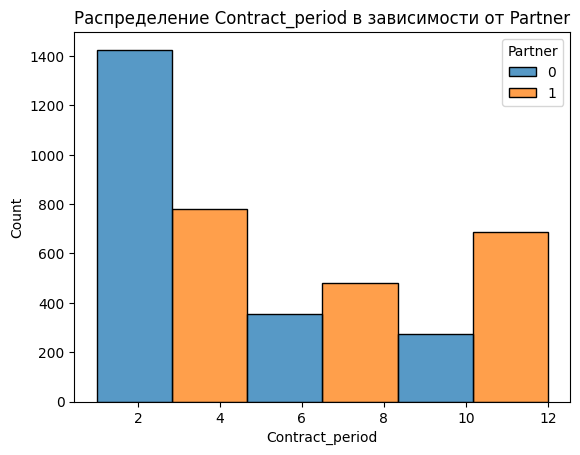

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df, x="Contract_period", hue="Partner", multiple="dodge", bins=3)
plt.title("Распределение Contract_period в зависимости от Partner")
plt.show()


<Axes: xlabel='Age', ylabel='Churn'>

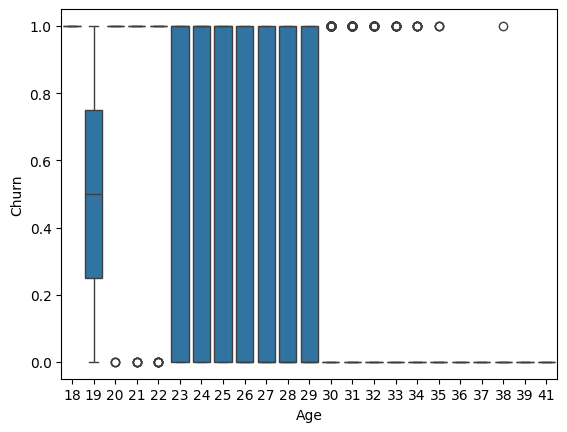

In [31]:
sns.boxplot(x = df['Age'], y = df['Churn'])

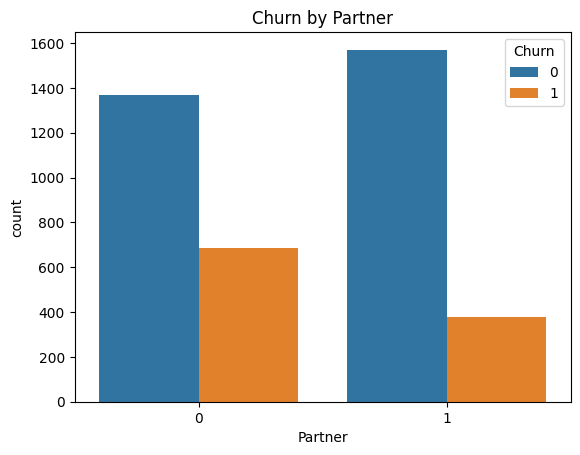

In [15]:
sns.countplot(x=df['Partner'], hue=df['Churn'])
plt.title("Churn by Partner")
plt.show()


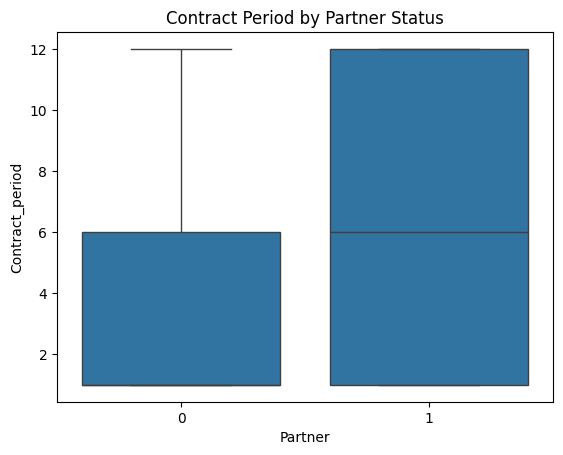

In [13]:
sns.boxplot(x=df['Partner'], y=df['Contract_period'])
plt.title("Contract Period by Partner Status")
plt.show()


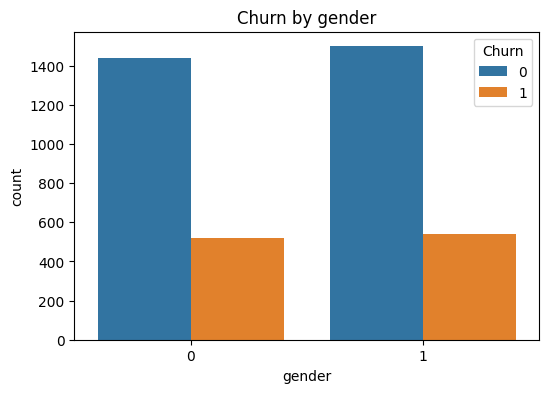

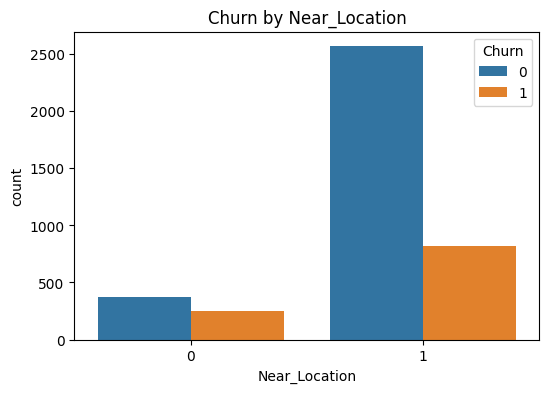

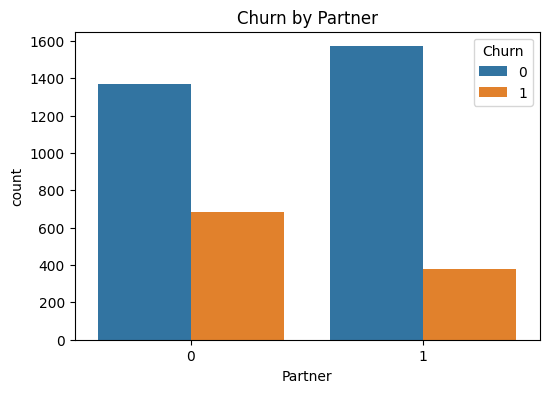

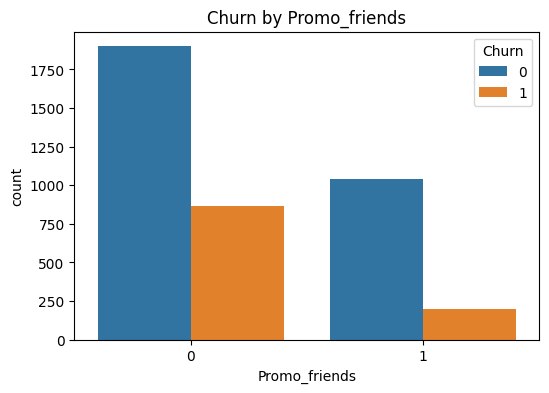

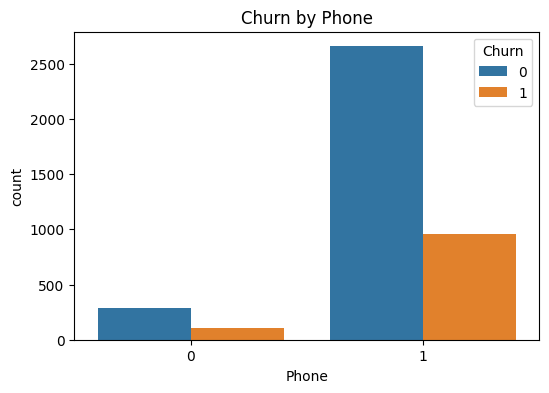

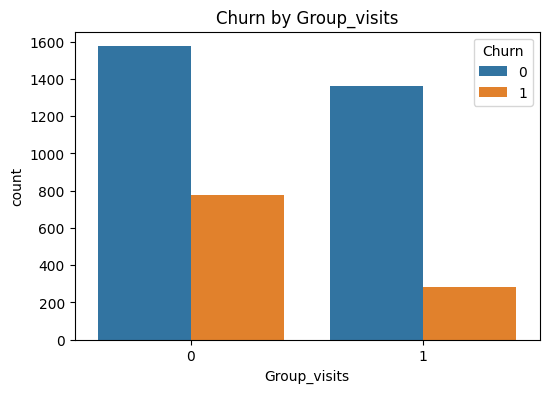

In [14]:
for col in ['gender', 'Near_Location', 'Partner', 'Promo_friends', 'Phone', 'Group_visits']:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df[col], hue=df['Churn'])
    plt.title(f'Churn by {col}')
    plt.show()
